In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## Creating a random data set with 3 classes

### Note this implementation of k-means relies purely on x values - consider why this might not work for certain clustering of data points.
### For a challenge - think of how to implement a k-means clustering algorithm that would use 2D euclidean distance instead of just x distances.

In [4]:
x1, y1 = random.randint(70, 100), random.randint(60, 100)
x2, y2 = random.randint(1, 30), random.randint(50, 100)
x3, y3 = random.randint(100, 150), random.randint(1, 50)

In [5]:
def create_points(x, y):

  new_x = np.random.normal(x, 5, 100)
  new_y = np.random.normal(y, 5, 100)

  return new_x, new_y

In [6]:
first_class_x, first_class_y = create_points(x1, y1)
second_class_x, second_class_y = create_points(x2, y2)
third_class_x, third_class_y = create_points(x3, y3)

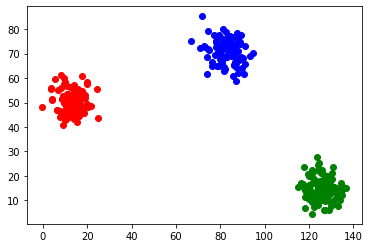

In [7]:
plt.figure()
plt.plot(first_class_x, first_class_y, 'bo')
plt.plot(second_class_x, second_class_y, 'ro')
plt.plot(third_class_x, third_class_y, 'go')

In [8]:
x = np.concatenate((first_class_x, second_class_x, third_class_x))
y = np.concatenate((first_class_y, second_class_y, third_class_y))

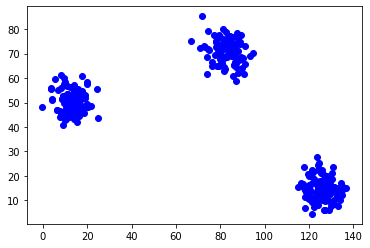

In [9]:
plt.figure()
plt.plot(x, y, 'bo')

In [10]:
print(len(x))

300


## Initializing the 3 means

In [11]:
# initialize three means

mean1 = random.randint(0, 299)
mean2 = random.randint(0, 299)
mean3 = random.randint(0, 299)

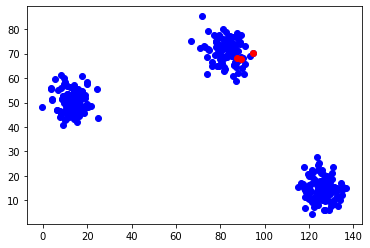

In [12]:
plt.figure()
plt.plot(x, y, 'bo')
plt.plot(x[mean1], y[mean1], 'ro')
plt.plot(x[mean2], y[mean2], 'ro')
plt.plot(x[mean3], y[mean3], 'ro')

## Running the K means clustering algorithm

In [13]:
def find_closest_category(mean1, mean2, mean3, x):

  diff1 = abs(mean1 - x)
  diff2 = abs(mean2 - x)
  diff3 = abs(mean3 - x)

  if diff1 <= diff2:
    # if closer to mean 1
    if diff1 <= diff3:
      return "1"
    else:
      return "3"
  else:
    # if closer to mean 2
    if diff2 <= diff3:
      return "2"
    else:
      return "3"

In [14]:
def clustering(mean1, mean2, mean3, x, y, iterations):

  '''Takes initial 3 means, calculates the mean x value 
  for closest points to the mean, then runs the function again recursively'''

  if iterations == 0:
    return mean1, mean2, mean3

  nmean1, nmean2, nmean3 = [], [], []

  for i in range(len(x)):
    category = find_closest_category(mean1, mean2, mean3, x[i])
    if category == "1":
      nmean1 += [x[i]]
    if category == "2":
      nmean2 += [x[i]]
    if category == "3":
      nmean3 += [x[i]]

  nmean1 = np.mean(nmean1)
  nmean2 = np.mean(nmean2)
  nmean3 = np.mean(nmean3)
    
  return clustering(nmean1, nmean2, nmean3, x, y, iterations - 1)

In [15]:
mean1, mean2, mean3 = clustering(x[mean1], x[mean2], x[mean3], x, y, 20)

## Find the points in the data set closest to the final means

In [16]:
# Find points closest to those means

def find_closest_points(mean1, mean2, mean3, x, y):

  min1, min2, min3 = 1e6, 1e6, 1e6

  for i in range(len(x)):

    if abs(x[i] - mean1) < min1:
      min1 = abs(x[i] - mean1)
      idx1 = i
    if abs(x[i] - mean2) < min2:
      min2 = abs(x[i] - mean2)
      idx2 = i
    if abs(x[i] - mean3) < min3:
      min3 = abs(x[i] - mean3)
      idx3 = i
    
  return idx1, idx2, idx3

In [17]:
idx1, idx2, idx3 = find_closest_points(mean1, mean2, mean3, x, y)

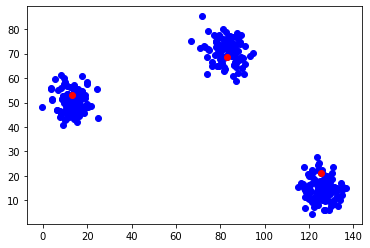

In [18]:
plt.figure()
plt.plot(x, y, 'bo')
plt.plot(x[idx1], y[idx1], 'ro')
plt.plot(x[idx2], y[idx2], 'ro')
plt.plot(x[idx3], y[idx3], 'ro')

## Full algorithm for classifying three classes

In [19]:
def k_means_clustering(x, y, iterations):

  N = len(x)

  mean1 = random.randint(0, N - 1)
  mean2 = random.randint(0, N - 1)
  mean3 = random.randint(0, N - 1)

  mean1, mean2, mean3 = clustering(x[mean1], x[mean2], x[mean3], x, y, iterations)

  idx1, idx2, idx3 = find_closest_points(mean1, mean2, mean3, x, y)

  category = []

  for i in x:
    category.append(find_closest_category(mean1, mean2, mean3, i))

  plt.figure()
  plt.plot([x[i] if category[i] == "1" else None for i in range(len(x))], [y[i] if category[i] == "1" else None for i in range(len(x))], 'bo', label = "class 1")
  plt.plot([x[i] if category[i] == "2" else None for i in range(len(x))], [y[i] if category[i] == "2" else None for i in range(len(x))], 'ro', label = "class 2")
  plt.plot([x[i] if category[i] == "3" else None for i in range(len(x))], [y[i] if category[i] == "3" else None for i in range(len(x))], 'go', label = "class 3")

  plt.plot(x[idx1], y[idx1], markersize=20, c = "black", marker = "X")
  plt.plot(x[idx2], y[idx2], markersize=20, c = "black", marker = "X")
  plt.plot(x[idx3], y[idx3], markersize=20, c = "black", marker = "X")

  plt.legend(loc = "best")
  plt.show()

  return [(x[idx1], y[idx1]), (x[idx2], y[idx2]), (x[idx3], y[idx3])]

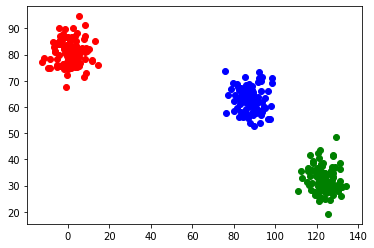

In [20]:
x1, y1 = random.randint(70, 100), random.randint(60, 100)
x2, y2 = random.randint(1, 30), random.randint(50, 100)
x3, y3 = random.randint(120, 150), random.randint(1, 50)


first_class_x, first_class_y = create_points(x1, y1)
second_class_x, second_class_y = create_points(x2, y2)
third_class_x, third_class_y = create_points(x3, y3)


plt.figure()
plt.plot(first_class_x, first_class_y, 'bo')
plt.plot(second_class_x, second_class_y, 'ro')
plt.plot(third_class_x, third_class_y, 'go')

x = np.concatenate((first_class_x, second_class_x, third_class_x))
y = np.concatenate((first_class_y, second_class_y, third_class_y))

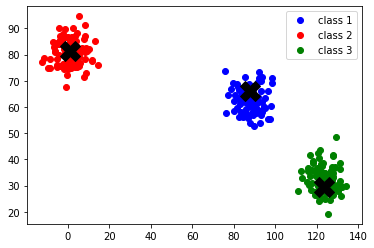

In [25]:
pos1, pos2, pos3 = k_means_clustering(x, y, 20)

## Prediction using k means from scikit learn

In [29]:
points = np.array(list(zip(x, y)))


kmeans = KMeans(n_clusters=3, random_state=0).fit(points)

### k means from scikit learn labels clusters from 0 onwards

In [35]:
print(kmeans.predict([[100, 100]]))  # for predicting new point 100, 100
print(kmeans.cluster_centers_) # coordinates of cluster centers

[2]


array([[  1.21784461,  80.87915521],
       [123.70996816,  32.31247944],
       [ 87.84589987,  62.95619702]])

In [36]:
print(pos1)
print(pos2)
print(pos3) # printing the coordinates of cluster centers from our own algorithm. Do they roughly match? (might be in different order)

(87.79816247534195, 65.97977903316682)
(1.2650766617845401, 81.30911385425695)
(123.73801412381114, 29.58468152454424)


## Classifying new point

In [22]:
def classify_new_point(newx, newy, pos1, pos2, pos3):

  x1, y1 = pos1
  x2, y2 = pos2
  x3, y3 = pos3

  euc_dist1 = np.sqrt((newx - x1)**2 + (newy - y1)**2)
  euc_dist2 = np.sqrt((newx - x2)**2 + (newy - y2)**2)
  euc_dist3 = np.sqrt((newx - x3)**2 + (newy - y3)**2)

  if min([euc_dist1, euc_dist2, euc_dist3]) == euc_dist1:
    return "1"
  elif min([euc_dist1, euc_dist2, euc_dist3]) == euc_dist2:
    return "2"
  else:
    return "3"

In [32]:
new_point = [100, 100]

In [33]:
print(classify_new_point(new_point[0], new_point[1], pos1, pos2, pos3))

1
